In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.linear_model import LinearRegression

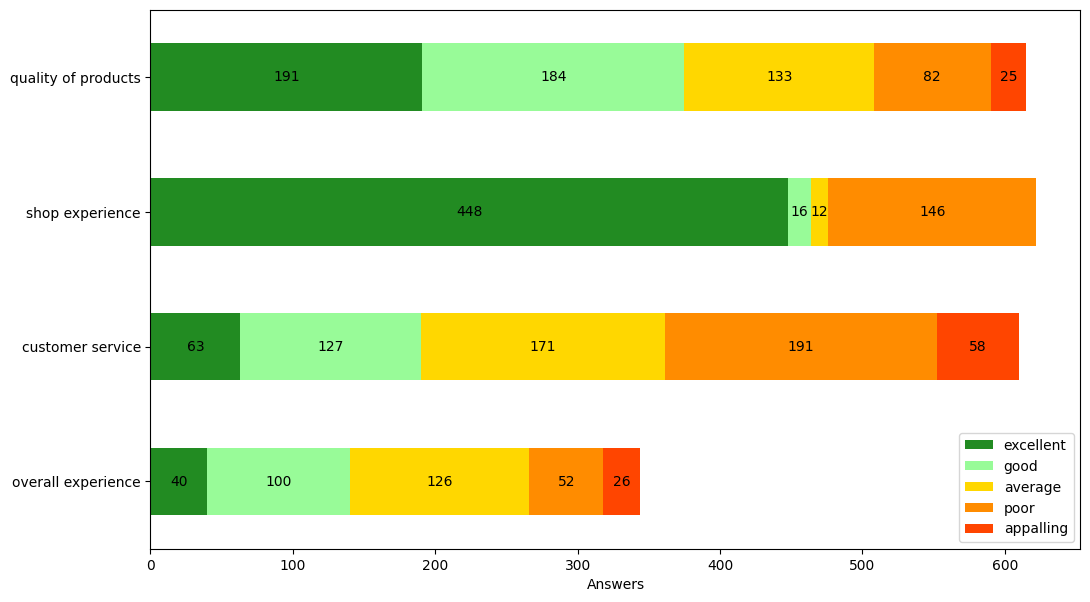

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as col

excellent = [191, 448, 63, 40]
good = [184, 16, 127, 100]
average = [133, 12, 171, 126]
poor = [82, 146, 191, 52]
appalling = [25, 0, 58, 26]



df = pd.DataFrame(data={'excellent': excellent, 'good': good, 'average': average, 'poor': poor, 'appalling': appalling})
df.index = ['quality of products', 'shop experience', 'customer service', 'overall experience']

cmap = ["#228B22", "#98FB98", "#FFD700", "#FF8C00", "#FF4500"]

ax = df.plot(kind='barh', stacked=True, figsize=(12, 7), rot=0, xlabel='Answers', ylabel='', color=cmap)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_width()) if v.get_width() > 0 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

plt.gca().invert_yaxis()

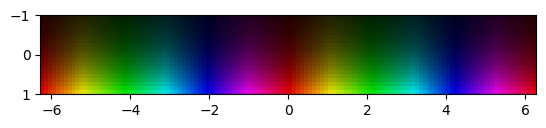

In [ ]:
import numpy as np
import colorcet
import colorsys
import matplotlib.colors as col

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)/np.e
    phi = np.mod(np.arctan2(y,x),2*np.pi)/(2*np.pi)
    return(rho, phi)

extent = (-2*np.pi, 2*np.pi,1, -1)

delta=0.1
x = np.arange(-1, 1, delta)
y = np.arange(-2 * np.pi, 2 * np.pi, delta)

X, Y = np.meshgrid(x,y)

X_1 = np.exp(X) * np.cos(Y)
Y_1 = np.exp(X) * np.sin(Y)

rho,phi = cart2pol(X_1,Y_1)
rho = rho.T
phi = phi.T
rho.reshape(20,126,1)
phi.reshape(20,126,1)

one = np.ones((20,126,1))
res = np.dstack([phi,one,rho])
plt.imshow(col.hsv_to_rgb(res),extent=extent)

plt.show()

In [ ]:
uploaded = files.upload()

Saving problem-sheet-02_proteins.npz to problem-sheet-02_proteins.npz


In [ ]:
data = np.load('problem-sheet-02_proteins.npz')

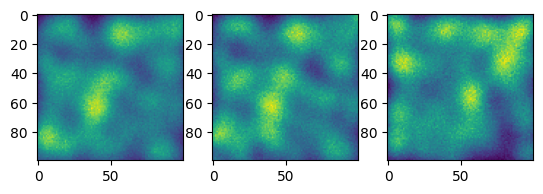

In [ ]:
f = plt.figure()
f.add_subplot(1, 3, 1)
plt.imshow(data['A'])
f.add_subplot(1, 3, 2)
plt.imshow(data['B'])
f.add_subplot(1, 3, 3)
plt.imshow(data['C'])

plt.show()

Text(0.5, 1.0, 'A = red | C = green')

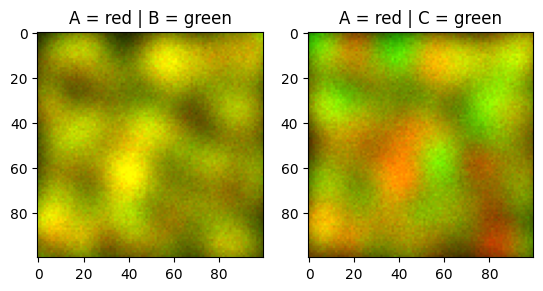

In [ ]:
from PIL import Image
zero = np.zeros((100,100,1))
# amplify the data to make colors more clear
data1 = data['A'].reshape((100,100,1)) * 20
data2 = data['B'].reshape((100,100,1)) * 20
data3 = data['C'].reshape((100,100,1)) * 20

test = np.dstack([data1,data2,zero])
test2 = np.dstack([data1,data3,zero])

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(test)
plt.title('A = red | B = green')
f.add_subplot(1, 2, 2)
plt.imshow(test2)
plt.title('A = red | C = green')


You can see that in the left image there is a dominant yellow which is a mix of red and green. That shows that the distributions of A and B are simillar.
In the second image green and red areas are more pronounced and that shows spots where the distributions dont overlap

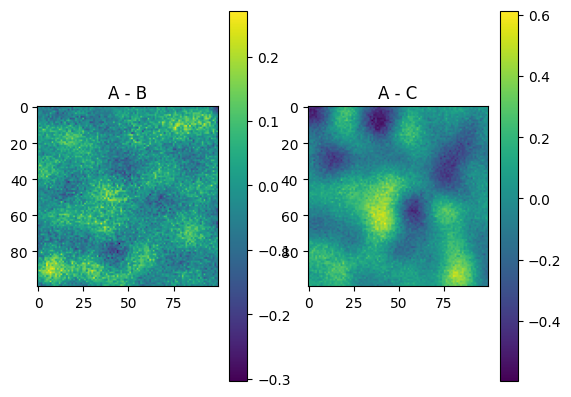

In [ ]:
data12 = data1 - data2
data13 = data1 - data3

f = plt.figure()
f.add_subplot(1, 2, 1)
plt.imshow(data12)
plt.title('A - B')
plt.colorbar()
f.add_subplot(1, 2, 2)
plt.imshow(data13)
plt.title('A - C')
plt.colorbar()

here you can see directly the difference between 2 distributions. The left picture shows smaller differences overall an a more even distribution of differences.
The second picture has larger differnce amplitudes and contains clear spots of large discrepencies.

We can take from that that A an B are simillar and A and C are more dissimillar